# CIFAR10 Data

**Note**: Please make sure to "Save a Copy" if you want to edit this script.

This section we dive deeper into the field of image classification problem, an important type of tasks to master in object recognition and computer vision.

We investigate a new dataset that is a little more complicated than the MNIST dataset we looked at before. The new data is called CIFAR10. It is slightly larger in sizes of each image and the images are colored. Hence, ther eare 3 channels, i.e. RGB. Source of the data is [here](https://www.cs.toronto.edu/~kriz/cifar.html)

<p align="center">
    <img src="https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png" width=600></img>
</p>

The labels for the objects are:

| Label | Description |
| ---   | ---         |
| 0	    | airplane    |
| 1	    | automobile  |
| 2	    | bird        |
| 3	    | cat         |
| 4	    | deer        |
| 5	    | dog         |
| 6	    | frog        |
| 7	    | horse       |
| 8	    | ship        |
| 9	    | truck       |

## Research Question

Can AI recognize different objects *in colors*?

## Agenda

This is the standrad image data for developing neural network models and convolutional neural network models. 

- Convolutional Neural Networks
- Transfer learning

Goal: To develop state-of-the-art CNN models.

## Notes

Most of the notes are taken using markdown area. To learn more diverse editting techniques for you to take quick notes using markdown, please click [here](https://colab.research.google.com/notebooks/markdown_guide.ipynb).

In [ ]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import tf
import tensorflow as tf

In [ ]:
# use tf API to get data
cifar10 = tf.keras.datasets.cifar10
(training_images, training_labels), (test_images, test_labels) = cifar10.load_data()
print(training_images.shape)
print(training_images[0].shape)

170508288/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(32, 32, 3)


In [ ]:
# define the objects names
obj_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

In [ ]:
# check out the unique levels
np.unique(training_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# notice the data type
training_labels[0], training_labels[0][0], obj_names[training_labels[0][0]]

# comment
# - the first [0] extracts the first instance
# - the second [0] gets the item from the array
# this is because [0] is different than 0 itself

(array([6], dtype=uint8), 6, 'frog')

Text(0.5, 1.0, 'object:horse')

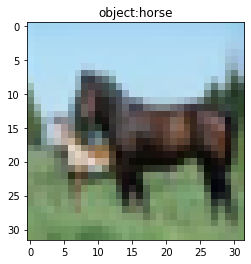

In [ ]:
# what does it look like?
i = 12
plt.imshow(training_images[i])
plt.title('object:'+obj_names[training_labels[i][0]])
# plt.colorbar()

In [ ]:
# rescale
training_images = training_images / 255
test_images = test_images / 255

In [ ]:
# one hot encode
training_labels_one_hot_encoded = tf.keras.utils.to_categorical(training_labels)
test_labels_one_hot_encoded = tf.keras.utils.to_categorical(test_labels)
print(training_labels_one_hot_encoded.shape, test_labels_one_hot_encoded.shape)

(50000, 10) (10000, 10)


# Convolutional Neural Networks

The benefit of using CNNs is their ability to develop an internal representation of a two-dimensional image. This allows the model to learn position and scale in variant structures in the data which is important when working with images. 

## Introduction

<p align='center'>
  <img src="https://stanford.edu/~shervine/teaching/cs-230/illustrations/architecture-cnn-en.jpeg?3b7fccd728e29dc619e1bd8022bf71cf" width=700></img>
</p>

First, we introduce convolution operation. A convolution operation is like a matrix operation. It is defined as element-wise matrix multiplication. 

### Convolution layer (CONV)

The convolution layer (CONV) uses filters that perform convolution operations as it is scanning the input II with respect to its dimensions. Its hyperparameters include the filter size FF and stride SS. The resulting output OO is called feature map or activation map.

<p align='center'>
  <img src="https://stanford.edu/~shervine/teaching/cs-230/illustrations/convolution-layer-a.png?1c517e00cb8d709baf32fc3d39ebae67" width=500></img>
</p>

$$
\underbrace{
\begin{bmatrix}
1 & 2 & 6 \\
5 & 4 & 5 \\
5 & 6 & 7 \\
\end{bmatrix}
}_\text{image}
⊗
\underbrace{
\begin{bmatrix}
1 & 1 \\
0 & 0 \\ 
\end{bmatrix}
}_\text{filter}
= 
\begin{bmatrix}
1 \times 1 + 2 \times 1 + 0 + 0 & 2 \times 1 + 6 \times 1 + 0 + 0 \\
5 \times 1 + 4 + 0 + 0 & 4 \times 1 + 5 + 0 + 0 \\
\end{bmatrix}
=
\begin{bmatrix}
3 & 8 \\
9 & 9 \\
\end{bmatrix}
$$

Next, we introduce pooling. There are two types of pooling: (1) average pooling, and (2) maximum pooling.

### Pooling (POOL)

The pooling layer (POOL) is a downsampling operation, typically applied after a convolution layer, which does some spatial invariance. In particular, max and average pooling are special kinds of pooling where the maximum and average value is taken, respectively.

This is average pooling.
$$
\text{ave}\bigg(
\begin{bmatrix}
4 & 6 \\
8 & 10 \\
\end{bmatrix}
\bigg) = (4 + 6 + 8 + 10) \frac{1}{4} = 28/4 = 7
$$

This is maximum pooling.
$$
\text{max}\bigg(
\begin{bmatrix}
4 & 6 \\
8 & 10 \\
\end{bmatrix}
\bigg) = \max\{4, 6, 8, 10\} = 10
$$

| Type | Max Pooling | Average Pooling |
| ---  | --- | --- |
| Purpose | Each pooling operation selects the maximum value of the current view | Each pooling operation averages the values of the current view |
| Illustration | <img src="https://stanford.edu/~shervine/teaching/cs-230/illustrations/max-pooling-a.png?711b14799d07f9306864695e2713ae07" height=200></img> | <img src="https://stanford.edu/~shervine/teaching/cs-230/illustrations/average-pooling-a.png?58f9ab6d61248c3ec8d526ef65763d2f" height=200></img> |
| Comments | Preserves detected features; Most commonly used | Downsamples feature map, Used in LeNet |

### Fully Connected (FC)

The fully connected layer (FC) operates on a flattened input where each input is connected to all neurons. If present, FC layers are usually found towards the end of CNN architectures and can be used to optimize objectives such as class scores.

Actions:
- Flatten: from 2D array to 1D array | for example, lay out each value from 3 by 3 matrix and expand them in a vector of length 9
- fully connected: each neuron (or unit) in each layer is connected with each neuron from the previously layer

<p align='center'>
  <img src="https://stanford.edu/~shervine/teaching/cs-230/illustrations/fully-connected-ltr.png?32caf9e07c79d652faa292812579d063"></img>
</p>


In [ ]:
training_images.shape

(50000, 32, 32, 3)

In [ ]:
# create a small convolutional layer
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(1, (10, 10), input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D())

# remark:
# This is a very simple model. Though it is called a model,
# it is actually not a neural network yet. Because there is 
# no dense layers yet. We just want to see what the Conv2D function
# does to the pictures.
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 1)         301       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 1)        0         
 )                                                               
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# before model fitting, let us just throw in 1 image
sample_output_before_fitting = model.predict(training_images[12].reshape((1, 32, 32, 3)))

In [ ]:
# check dimension
sample_output_before_fitting.shape

(1, 11, 11, 1)

You will see a tuple of 4 numbers. They mean:
- 1st: sample size
- 2nd: width of the image
- 3rd: height of the image
- 4th: any colors, if it's 1, it's greyscale

In [ ]:
# resize
import cv2
resized_image_ = cv2.resize(training_images[12], (11, 11))
resized_image_.shape

(11, 11, 3)

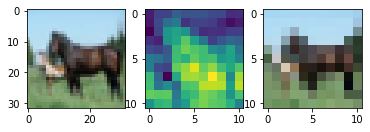

In [ ]:
# original picture
plt.subplot(1, 3, 1)
# frog
plt.imshow(training_images[12])
# transformed image
plt.subplot(1, 3, 2)
plt.imshow(sample_output_before_fitting[:,:,:,0].reshape((11, 11)))
# plt.title('some transformed picture')
# plt.colorbar()
# cv2 resize function
plt.subplot(1, 3, 3)
plt.imshow(resized_image_)

# show
plt.show()

Now let us use the understanding of convolutional layer to build our first Convolutional Neural Network. We design an architecture that is adapted from the LeNet model. The original paper is published [here](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf).

<p align='center'>
  <img src='https://miro.medium.com/max/805/1*y68ztClLF6ae7P53ayyFzQ.png' width=650></img>
</p>

Suppose your image data has dimension `(60000, 28, 28, 3)`. This means that you have 60000 images. Each image is 28 rows and 28 columns with RGB channels (color channel). Hence, you should set the argument `input_shape=(28, 28, 3)`. Notice that `(..)` is a tuple.

If you have one color only (i.e. greyscale), then it depends on how you process the images. The advice is to reshape dimension into `(60000, 28, 28, 1)` instead of `(60000, 28, 28)`. In this case, you can set the argument `input_shape=(28, 28, 1)`.

In [ ]:
import numpy as np

In [ ]:
np.ones((3, 2, 2))

array([[[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]]])

In [ ]:
np.ones((3, 2, 2))

array([[[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]]])

In [ ]:
# build a CNN (Convolutional Neural Network) model
model = tf.keras.models.Sequential(name="MODEL_JohnSmith")

## Your Changes Start Here ##
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3), name="Conv_1"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu', name="Conv_2"))
model.add(tf.keras.layers.MaxPooling2D()) 

# You can have more CONVOLUTIONAL layers! # <===== TRY TO TUNE THIS!!!
# Each convolutional layer can have arbitrary different number of units! # <===== TRY TO TUNE THIS!!!
# ... you can have however many you want
## Your Changes Ends Here ##
# up to here, we finish coding the convolutional layers, we have not done neural network layers

# build neural network layers
model.add(tf.keras.layers.Flatten()) # neural network requires the input layer to be a vector instead of 2D array

## Your Changes Start Here ##
# in regression: y = b1x1 + b2x2 + c | bias=True
#                y = b1x1 + b2x2     | bias=False
model.add(tf.keras.layers.Dense(256, activation='relu', use_bias=True)) # input units (usually starts with 128) and activation (it's a choice, usually relu)
model.add(tf.keras.layers.Dense(128, activation='relu', use_bias=True)) # input units (usually starts with 128) and activation (it's a choice, usually relu)
# You can have more DENSE layers! # <===== TRY TO TUNE THIS!!!
# Each dense layer can have arbitrary different number of units! # <===== TRY TO TUNE THIS!!!
# ... you can have however many you want
## Your Changes Ends Here ##
model.add(tf.keras.layers.Dense(10, activation='softmax')) # output layer or end layer | you have to match the number of classes

# summary
model.summary()

Model: "MODEL_JohnSmith"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv_1 (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 Conv_2 (Conv2D)             (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 256)           

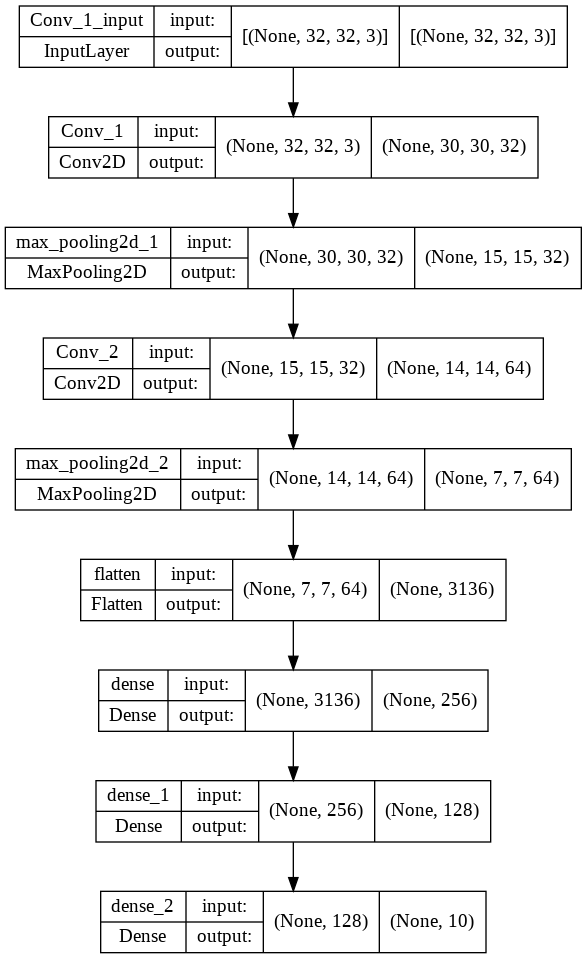

In [ ]:
# plot using a utility function
tf.keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True, show_layer_names=True)
# where is it? 
# This file, my_model.png, is under your Colab folder.
# Go to the left, click on the "Folder" button, and you should see this png file.

In [ ]:
# callbacks
callbacks = [ tf.keras.callbacks.ModelCheckpoint("some_sample_cnn_model.h5", save_best_only=True) ]

In [ ]:
# compile
model.compile(
    ## Your Changes Start Here ##
    # optimizer: https://keras.io/api/optimizers/
    # loss: https://keras.io/api/losses/
    optimizer="adam",
    loss="categorical_crossentropy",
    ## Your Changes Ends Here ##
    metrics=['accuracy']
)

In [ ]:
# load gpu
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


### Training

In [ ]:
# fit | we train the model here
# use GPU
batch_size=64
with tf.device('/device:GPU:0'):
    history = model.fit(
        training_images, # X: the data the model use to learn
        training_labels_one_hot_encoded, # Y: the target the model try to predict
        
        ## Your Changes Start Here ##
        # there is a sweet spot, you don't want to overfit, but you also want to make sure your model learned something
        validation_split=0.2, # a ratio of percentage that the model uses for validating
        batch_size=training_images.shape[0] // batch_size,
        epochs=50,
        ## Your Changes Ends Here ##
        callbacks=callbacks
    )

Epoch 1/50
52/52 [==============================] - 4s 18ms/step - loss: 1.8782 - accuracy: 0.3206 - val_loss: 1.6121 - val_accuracy: 0.4184
Epoch 2/50
52/52 [==============================] - 1s 11ms/step - loss: 1.5097 - accuracy: 0.4582 - val_loss: 1.4446 - val_accuracy: 0.4910
Epoch 3/50
52/52 [==============================] - 1s 11ms/step - loss: 1.3631 - accuracy: 0.5141 - val_loss: 1.3414 - val_accuracy: 0.5227
Epoch 4/50
52/52 [==============================] - 1s 11ms/step - loss: 1.2633 - accuracy: 0.5526 - val_loss: 1.2438 - val_accuracy: 0.5620
Epoch 5/50
52/52 [==============================] - 1s 11ms/step - loss: 1.1956 - accuracy: 0.5776 - val_loss: 1.2435 - val_accuracy: 0.5671
Epoch 6/50
52/52 [==============================] - 1s 11ms/step - loss: 1.1392 - accuracy: 0.5989 - val_loss: 1.1824 - val_accuracy: 0.5795
Epoch 7/50
52/52 [==============================] - 1s 11ms/step - loss: 1.0892 - accuracy: 0.6187 - val_loss: 1.1403 - val_accuracy: 0.6000
Epoch 8/50
52

### Evaluation

In [ ]:
# quick evaluation on test set
this_final_loss_, this_final_acc_ = model.evaluate(test_images, test_labels_one_hot_encoded)
print('Test Result: Loss is '+str(this_final_loss_)+', and accuracy is '+str(this_final_acc_))

313/313 [==============================] - 1s 2ms/step - loss: 1.6502 - accuracy: 0.6661
Test Result: Loss is 1.650199055671692, and accuracy is 0.666100025177002


### Visualize Performance

Text(0.5, 1.0, 'accuracy')

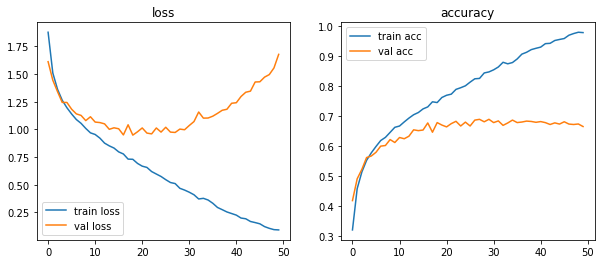

In [ ]:
# plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'])
plt.title('loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train acc', 'val acc'])
plt.title('accuracy')

In [ ]:
# predict
test_labels_one_hot_encoded_predicted = model.predict(test_images)
test_labels_predicted = np.argmax(test_labels_one_hot_encoded_predicted, axis=1)
print(test_labels.shape)
print(test_labels_predicted.shape)

(10000, 1)
(10000,)


In [ ]:
# import 
from sklearn import metrics

In [ ]:
# confusion matrix
conf_mat = metrics.confusion_matrix(y_true=test_labels, y_pred=test_labels_predicted)
conf_mat

array([[779,  38,  36,  26,  15,  17,   4,   5,  40,  40],
       [ 33, 833,   7,  19,   3,   5,   3,   4,  23,  70],
       [ 95,  16, 493,  92,  78, 120,  38,  40,  15,  13],
       [ 33,  22,  55, 479,  47, 270,  30,  34,  11,  19],
       [ 45,  13,  75,  97, 572,  88,  27,  65,  14,   4],
       [ 23,  10,  25, 146,  28, 704,   6,  48,   4,   6],
       [ 17,  22,  51, 102,  43,  97, 639,   9,  10,  10],
       [ 30,  14,  32,  49,  40, 101,   4, 705,   4,  21],
       [ 89,  53,  11,  23,   4,  27,   4,   3, 755,  31],
       [ 49, 151,   7,  20,   7,  19,   3,  12,  30, 702]])

In [ ]:
# waht are the diagonals
np.diagonal(conf_mat)

array([779, 833, 493, 479, 572, 704, 639, 705, 755, 702])

In [ ]:
# sum of diagonal
np.sum(np.diagonal(conf_mat))

6661

In [ ]:
# sum of the matrix
np.sum(conf_mat)

10000

In [ ]:
# accuracy
np.sum(np.diagonal(conf_mat))/np.sum(conf_mat)

0.6661

In [ ]:
# quick way
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

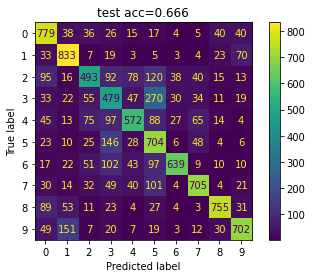

In [ ]:
# plot
cm = confusion_matrix(test_labels, test_labels_predicted, labels=np.arange(10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot()
plt.title('test acc='+str(np.round(this_final_acc_, 3)))
plt.show()

So we have some sort of results. However, the performance is not that good. We have certain high numbers on the diagonals of the confusion matrix, but the errors are also pretty high too.

## Transfer Learning

We have been building models and training them ourselves from scratch. For example, we can illustrate the old pipeline as below.
$$
\begin{matrix}
\text{Data} & \rightarrow & \text{NeuralNet:}
\begin{bmatrix}
\circ \\
\circ \\
\vdots \\
\circ \\
\end{bmatrix}
\dots 
\begin{bmatrix}
\circ \\
\vdots \\
\circ \\
\end{bmatrix}
& \rightarrow \text{Softmax}
\end{matrix}
$$

At today's level, many models and datasets have been investigated before. If that is the case, it is often times much more benefitial to use a pre-trained model. 

Transfer learning uses the following pipeline. Instead of building a model directly from the data, transfer learning proposes to use a pre-trained model on a powerful computer such that though the model is not trained on the current data the internal structure can still be extracted. This is because there is an underlying assumption that the current data shares similar feature with the data used on the pre-trained model.
$$
\begin{matrix}
\text{Data} \rightarrow \text{Pre-trained Model} \rightarrow \text{Features} \rightarrow & 
\begin{bmatrix}
\circ \\
\circ \\
\vdots \\
\circ \\
\end{bmatrix}
\dots 
\begin{bmatrix}
\circ \\
\vdots \\
\circ \\
\end{bmatrix}
& \rightarrow \text{Softmax}
\end{matrix}
$$

<p align='center'>
  <img src="https://datascience.aero/wp-content/uploads/2020/03/transferlearning-119.jpg" width=800></img>
</p>


This section let us investigate the procedure of using a pre-trained model.

In [ ]:
# rescale
x_train = training_images.astype('float32')
x_test = test_images.astype('float32')
 
# z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [ ]:
# display dimension
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
# check min and max
np.min(x_train), np.max(x_train)

(-1.8816491, 2.093401)

In [ ]:
# import 
import tensorflow as tf

Transfer learning requires a pretrained model. A good pre-trained model for demonstration purpose is VGG16. The keras API for VGG16 can be found [here](https://keras.io/api/applications/vgg/). The original paper of VGG16 can be found [here](https://arxiv.org/abs/1409.1556). The model diagram can be shown below.

<p align='center'>
  <img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png" width=800></img>
</p>

### Dropout

Simply put, dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random. By “ignoring”, I mean these units are not considered during a particular forward or backward pass.

Given that we know a bit about dropout, a question arises — why do we need dropout at all? Why do we need to literally shut-down parts of a neural networks?

The answer to these questions is “to prevent over-fitting”.

A fully connected layer occupies most of the parameters, and hence, neurons develop co-dependency amongst each other during training which curbs the individual power of each neuron leading to over-fitting of training data.

<p align='center'><img src='https://miro.medium.com/max/1044/1*iWQzxhVlvadk6VAJjsgXgg.png' width=600></img></p>

More see this [blog](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5).

In [ ]:
# add layer
def create_model(upsampling_multiplier, n_classes, hidden=[2048,1024], dropOutRate=0.2):
    """
    Compiles a model integrated with VGG16 pretrained layers
    
    upsampling_multiplier: int              - number of upsampling2d needed
    n_classes:             int              - number of classes for the output layer
    hidden:                list of integers - a list of integers to indicate the number of units for each dense layer added in the middle
    dropOutRate:           fraction         - a number indicating drop out rate
    """
    
    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = tf.keras.applications.vgg16.VGG16(
        include_top=False,
        weights='imagenet',
        pooling='max')

    # design model
    model= tf.keras.Sequential()

    # upsample
    for i in range(upsampling_multiplier):
      model.add(tf.keras.layers.UpSampling2D()) # trick 1

    # add base model
    model.add(conv_base)
    model.add(tf.keras.layers.Flatten())

    # design hidden layers
    for curr_unit in hidden:
      model.add(tf.keras.layers.Dense(curr_unit, activation=('relu'))) 
      model.add(tf.keras.layers.Dropout(dropOutRate)) # trick 2

    # last layer
    model.add(tf.keras.layers.Dense(n_classes, activation=('softmax')))

    # output    
    return model

In [ ]:
# set the model using the function defined above
model = create_model(upsampling_multiplier=1, hidden=[2048, 1024, 1024, 512, 512, 256, 256, 128, 128], n_classes=10)

58900480/58889256 [==============================] - 1s 0us/step


Here is a more diverse source list ([guide1](https://towardsdatascience.com/step-by-step-guide-to-using-pretrained-models-in-keras-c9097b647b29), and [guide2](https://towardsdatascience.com/step-by-step-guide-to-using-pretrained-models-in-keras-c9097b647b29)) if you want more variety of building your own model using a pre-trained model. 

### Training

In [ ]:
# training
batch_size = 128
opt_rms = tf.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

# fit | we train the model here
# use GPU
with tf.device('/device:GPU:0'):
    history = model.fit(
        x_train, training_labels_one_hot_encoded,
        steps_per_epoch=x_train.shape[0] // batch_size,
        epochs=100,
        verbose=1,
        validation_data=(x_test, test_labels_one_hot_encoded)
    )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/100
390/390 [==============================] - 28s 62ms/step - loss: 2.1832 - accuracy: 0.1580 - val_loss: 1.7444 - val_accuracy: 0.3197
Epoch 2/100
390/390 [==============================] - 23s 58ms/step - loss: 1.6908 - accuracy: 0.3567 - val_loss: 1.2496 - val_accuracy: 0.5650
Epoch 3/100
390/390 [==============================] - 23s 58ms/step - loss: 1.2896 - accuracy: 0.5353 - val_loss: 0.9166 - val_accuracy: 0.7180
Epoch 4/100
390/390 [==============================] - 23s 58ms/step - loss: 0.9834 - accuracy: 0.6636 - val_loss: 0.6677 - val_accuracy: 0.7628
Epoch 5/100
390/390 [==============================] - 23s 59ms/step - loss: 0.7740 - accuracy: 0.7403 - val_loss: 0.5619 - val_accuracy: 0.8090
Epoch 6/100
390/390 [==============================] - 23s 58ms/step - loss: 0.6261 - accuracy: 0.7974 - val_loss: 0.5300 - val_accuracy: 0.8481
Epoch 7/100
390/390 [==============================] - 23s 58ms/step - loss: 0.4959 - accuracy: 0.8532 - val_loss: 0.5722 - val_ac

390/390 [==============================] - 12s 32ms/step - loss: 0.0190 - accuracy: 0.9975 - val_loss: 1.2921 - val_accuracy: 0.9137


### Visualize Performance

The training performance using VGG16.

Text(0.5, 1.0, 'accuracy')

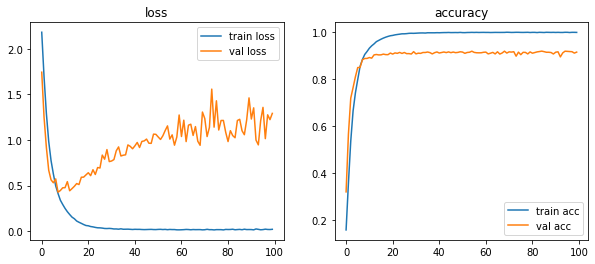

In [ ]:
# plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'])
plt.title('loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train acc', 'val acc'])
plt.title('accuracy')

The training performance using DenseNet.

Text(0.5, 1.0, 'accuracy')

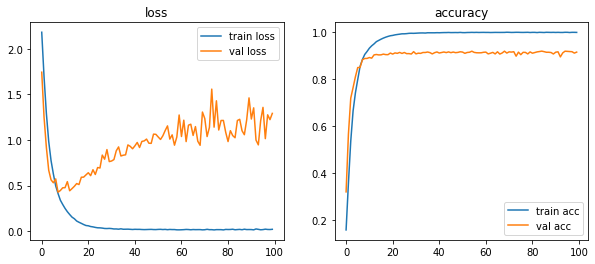

In [ ]:
# plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'])
plt.title('loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train acc', 'val acc'])
plt.title('accuracy')

### Evaluation

In [ ]:
# quick evaluation on test set
this_final_loss_, this_final_acc_ = model.evaluate(x_test, test_labels_one_hot_encoded)
print('Test Result: Loss is '+str(this_final_loss_)+', and accuracy is '+str(this_final_acc_))

313/313 [==============================] - 2s 7ms/step - loss: 1.2921 - accuracy: 0.9137
Test Result: Loss is 1.2921222448349, and accuracy is 0.9136999845504761


In [ ]:
# predict
test_labels_one_hot_encoded_predicted = model.predict(test_images)
test_labels_predicted = np.argmax(test_labels_one_hot_encoded_predicted, axis=1)
print(test_labels.shape)
print(test_labels_predicted.shape)

(10000, 1)
(10000,)


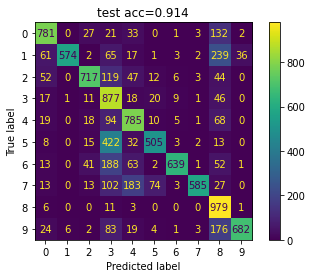

In [ ]:
# plot
cm = confusion_matrix(test_labels, test_labels_predicted, labels=np.arange(10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot()
plt.title('test acc='+str(np.round(this_final_acc_,3)))
plt.show()

## Research Proposal

Research proposal is a guideline of what you want to do with your project. You should start with a topic title and a punchline of your project.

### Topic

This project designs a deep Convolutional Neural Network (CNN) to classify images into different labels. The goal is to see whether advanced AI models such as deep CNN can recognize the patterns in the images.

### Proposed Experiment

This project starts with a baseline model. This is a simple neural network, also known as Artificial Neural Network (ANN). An ANN has dense layers and the layers are formed using a linear combination (these are the neurons in the dense layers) and an activation function.

This project also investigates advanced models. This is a family of different Convolutional Neural Network (CNN). Models such as CNN are consist of convolutional layers. Give an example of a convolution operation.

### Expected Results

In a simple data such as MNIST Handwritten Digits, we expect baseline model to perform about 97% and advanced model to perform about 98%.

For example, from the above experiments attempted, we can summarize the following table.

| No. | Conv | Hidden | Performance |
| --- | ---  | ---    | ---         | 
| 1   | 0    | [256, 128, 64] | 98% |
| 2   | [32, 64] | [256, 128] | 99% |
| 3   | VGG16  | [512, 128]   | 90%   |

Can you detect a pattern here? If yes, how would you propose the next step?

### Future Work

This project will implement baseline model and advanced models on Chest X-ray image dataset. The project will build deep CNN model to help doctors to make diagnosis of lung cancer. 

In addition, optional work can be to investigate the explainability of the deep CNN models. CNN models, after tuning, can have high prediction performance. However, it requires additional work to help the doctors to explain how CNN work. This is the explainability side of the project that we can do if we have more time. 